# Working with the Number of Jobs by Company dataset
Source: https://www.kaggle.com/datasets/tartaassiatant/latest-jobs-in-maine-february-2023

In [35]:
# !pip install requests
# !pip install beautifulsoup4

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Inspecting and cleaning the data

In [37]:
df = pd.read_csv("number-of-jobs-by-comany-in-ME-0223.csv")
df.head()


,CompanyName,JobsInTotal,City,State
0,Zynex Medical Inc,1,Albany,ME
1,Zynex Medical,2,Portland,ME
2,Zynex Medical,1,Augusta,ME
3,Zurich NA,24,Augusta,ME
4,Zurich NA,1,"Augusta, ME",ME


In [38]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompanyName  41784 non-null  object
 1   JobsInTotal  41785 non-null  int64 
 2   City         41104 non-null  object
 3   State        41785 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


,CompanyName,JobsInTotal,City,State
count,41784,41785.000000,41104,41785
unique,12109,NaN,1316,1
top,Consolidated Communications,NaN,Portland,ME
freq,265,NaN,4029,41785
mean,NaN,6.130549,NaN,NaN
std,NaN,23.298222,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN


In [39]:
df[df.CompanyName.isnull()]
df.loc[df.CompanyName.isnull(), 'CompanyName'] = 'Unknown'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompanyName  41785 non-null  object
 1   JobsInTotal  41785 non-null  int64 
 2   City         41104 non-null  object
 3   State        41785 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [40]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompanyName  41785 non-null  object
 1   JobsInTotal  41785 non-null  int64 
 2   City         41104 non-null  object
 3   State        41785 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [41]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41104 entries, 0 to 41783
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompanyName  41104 non-null  object
 1   JobsInTotal  41104 non-null  int64 
 2   City         41104 non-null  object
 3   State        41104 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [42]:
df.City.unique()

array(['Albany', 'Portland', 'Augusta', ..., 'Seal Harbor',
       'Allegany-Chautauqua Area', 'Portland Plant - Portland'],
      dtype=object)

## Sorting and graphing the data by the top 30 cities

In [43]:
grouped_df = df.groupby("City").JobsInTotal.sum().sort_values(ascending=False).reset_index()
grouped_df

,City,JobsInTotal
0,Portland,44735
1,Bangor,27607
2,Lewiston,24229
3,Augusta,14807
4,South Portland,14799
...,...,...
1311,Freeman Township,1
1312,"Freeport,ME",1
1313,RAYMOND,1
1314,Prospect Harbor,1


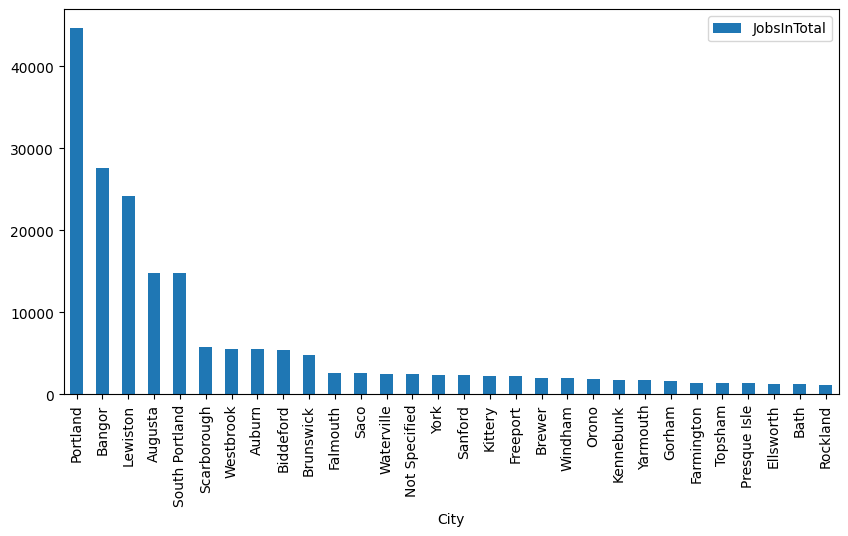

In [44]:
truncated_grouped_df = grouped_df.head(30)
truncated_grouped_df.plot(kind='bar', x='City', y='JobsInTotal', figsize=(10, 5))
plt.show()

## Using BeautifulSoup to sort city data by county

### Getting the webpage data with requests

In [45]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_municipalities_in_Maine"
data = requests.get(wiki_url).text

### Using BeautifulSoup

In [46]:
bs = BeautifulSoup(data, 'html.parser')
table = bs.find('table', class_='wikitable sortable static-row-numbers')
my_list = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 0:
        my_list.append([cell.text.strip() for cell in cells])
mun_df = pd.DataFrame(my_list, columns=['Municipality', "Type", "County", "Population", "Area", "Incorporated"])
mun_df.head()

,Municipality,Type,County,Population,Area,Incorporated
0,Portland,City,Cumberland (seat),"68,408",21.6,1786
1,Lewiston,City,Androscoggin,"37,121",34.2,1795
2,Bangor,City,Penobscot (seat),"31,753",34.3,1834
3,South Portland,City,Cumberland,"26,498",12.1,1895
4,Auburn,City,Androscoggin (seat),"24,061",59.3,1842


## Cleaning up the Municipality Dataframe

In [47]:
mun_df.County = mun_df.County.apply(lambda row: row if row[-1] != ")" else row[:-7])
mun_df.head()

,Municipality,Type,County,Population,Area,Incorporated
0,Portland,City,Cumberland,"68,408",21.6,1786
1,Lewiston,City,Androscoggin,"37,121",34.2,1795
2,Bangor,City,Penobscot,"31,753",34.3,1834
3,South Portland,City,Cumberland,"26,498",12.1,1895
4,Auburn,City,Androscoggin,"24,061",59.3,1842


## Using the Municipality Dataframe to clean up the original Dataframe

In [55]:
non_match_df = df[~df.City.isin(mun_df.Municipality)]
df.drop(non_match_df.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36624 entries, 1 to 41783
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompanyName  36624 non-null  object
 1   JobsInTotal  36624 non-null  int64 
 2   City         36624 non-null  object
 3   State        36624 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [56]:
df["county"] = df.City.map(mun_df.set_index("Municipality").County)
df.head()

,CompanyName,JobsInTotal,City,State,county
1,Zynex Medical,2,Portland,ME,Cumberland
2,Zynex Medical,1,Augusta,ME,Kennebec
3,Zurich NA,24,Augusta,ME,Kennebec
5,Zumiez Inc.,1,Bangor,ME,Penobscot
7,Zumiez Inc.,1,South Portland,ME,Cumberland


## Graphing total jobs by county

In [57]:
grouped_county = df.groupby("county").JobsInTotal.sum().sort_values(ascending=False).reset_index()
grouped_county

,county,JobsInTotal
0,Cumberland,93321
1,Penobscot,37906
2,Androscoggin,33661
3,York,26001
4,Kennebec,22438
5,Aroostook,4322
6,Oxford,3774
7,Sagadahoc,3666
8,Hancock,3472
9,Knox,3426


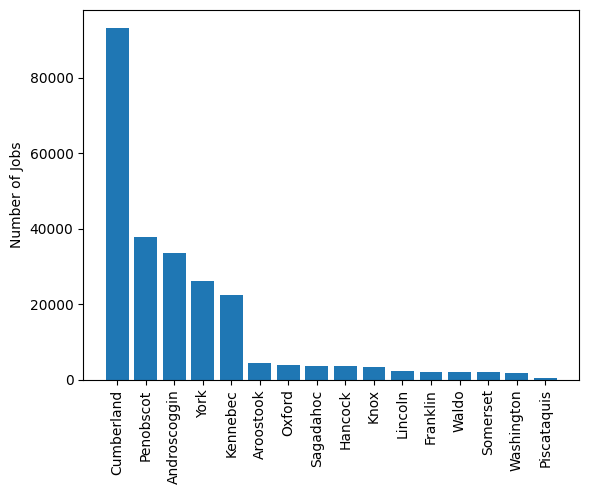

In [64]:
plt.bar(grouped_county.county, grouped_county.JobsInTotal)
xticks = plt.xticks(rotation=90)
ylabel = plt.ylabel("Number of Jobs")
plt.show()